In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import preproc
from join_data import join_y
import feature_eng
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',1000)

## Reading in data and preproc

In [87]:
df = pd.read_json('laptops.json')
df = join_y(df, 'laptops_sales.csv')
df = preproc.clean_cols(df)
df = preproc.fill_empty_lists(df)
df = preproc.preprocess_reviews(df)
df = feature_eng.generate_features(df)
df = feature_eng.do_PCA(df)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\Rory\Desktop\projects\expenditure_prox\preproc.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_preproc'] = df['review_text'].apply(lambda x: __remove_accented_chars(x))
c:\Users\Rory\Desktop\projects\expenditure_prox\preproc.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
from sklearn.metrics import silhouette_score
def evaluate_clusters(
    X,
    predicted_y,
    binned_y,
    qbinned_y,
 
):
    """Evaluates clustering results, uses silouette and rand if specified. Cannot be used with DBSCAN"""
    s_score = silhouette_score(X, predicted_y)
    f, axes = plt.subplots(2,1, figsize=(10,15))
    sns.kdeplot(predicted_y, binned_y.astype(int), shade=True, ax=axes[0])
    axes[0].set_title('Cluster labels with spacially binned sales')
    sns.kdeplot(predicted_y, qbinned_y.astype(int), shade=True, ax=axes[1])
    axes[1].set_title('Cluster labels with quantile binned sales')
    print(f"Silhouette score: {s_score}")

In [3]:
df.head(1)

,index,product_name,price,urls,remotekey,shelf_order,item_category,no_reviews,recommendation_percent,review_date,review_rating,review_text,review_title,summary_star_rating,code,TOTAL_SALES,text_preproc,text_preproc2,neg_reviews,pos_reviews,price/Rvol,Rvol/%rec,posR/Rvol,negR/Rvol,index,c1,c2
0,0,hp 14in ryzen 3 4gb 128gb fhd laptop black,399.99,https://www.argos.co.uk/product/9200856?clickP...,9200856,2,[Includes Microsoft 365 Personal and 1TB OneDr...,17,100,"[30 July 2021, 30 July 2021, 21 July 2021, 8 J...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",[Easy to set up and navigate. Nice and slim an...,"[Love my new HP laptop, Easy to use, Great lap...",4.9,3313337993733739104503754749411541515033011334...,1810,"[[easy, to, set, up, and, navigate, nice, and,...","[[easy, set, navigate, nice, slim, light, carr...",0,17,23.528824,0.17,1.0,0.0,0,-0.120458,-1.31103


# Distributions

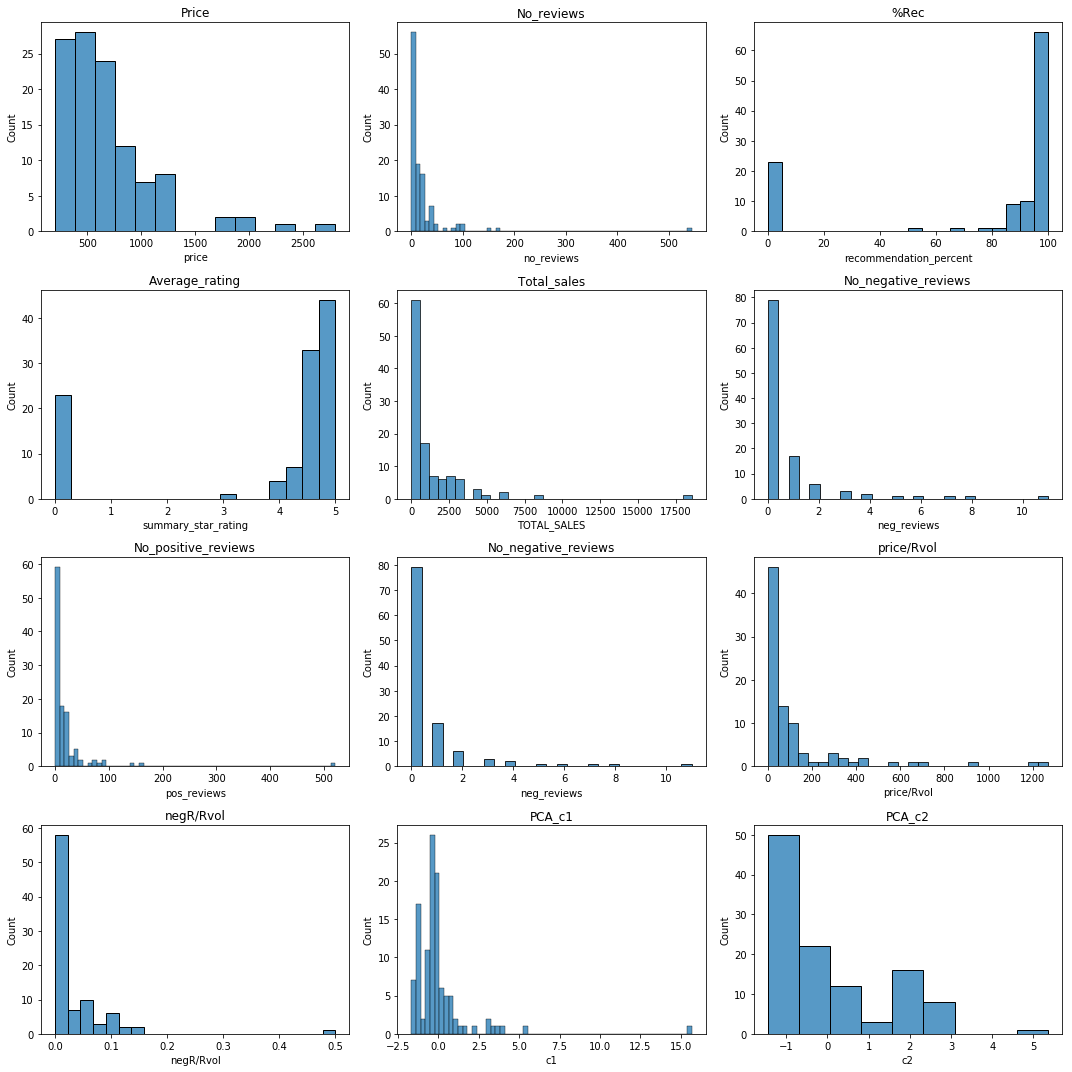

In [4]:
f, axes = plt.subplots(4,3, figsize=(15,15))
sns.histplot(df['price'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Price')
sns.histplot(df['no_reviews'].dropna(), ax=axes[0,1])
axes[0,1].set_title('No_reviews')
sns.histplot(df['recommendation_percent'].dropna(), ax=axes[0,2])
axes[0,2].set_title('%Rec')
sns.histplot(df['summary_star_rating'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Average_rating')
sns.histplot(df['TOTAL_SALES'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Total_sales')
sns.histplot(df['neg_reviews'].dropna(), ax=axes[1,2])
axes[1,2].set_title('No_negative_reviews')
sns.histplot(df['neg_reviews'].dropna(), ax=axes[2,1])
axes[2,1].set_title('No_negative_reviews')
sns.histplot(df['pos_reviews'].dropna(), ax=axes[2,0])
axes[2,0].set_title('No_positive_reviews')
sns.histplot(df['price/Rvol'].dropna(), ax=axes[2,2])
axes[2,2].set_title('price/Rvol')
sns.histplot(df['negR/Rvol'].dropna(), ax=axes[3,0])
axes[3,0].set_title('negR/Rvol')
sns.histplot(df['c1'].dropna(), ax=axes[3,1])
axes[3,1].set_title('PCA_c1')
sns.histplot(df['c2'].dropna(), ax=axes[3,2])
axes[3,2].set_title('PCA_c2')

plt.tight_layout()

## Scaling

In [91]:
# 0 mean variance scaling, keeps NANS
sdf = df.select_dtypes(include=['float','int64'])
sdf['price/Rvol'] = sdf['price/Rvol'].replace(np.inf, sdf['price/Rvol'].median())
sdf = (sdf-sdf.mean())/sdf.std()
sdf['TOTAL_SALES'] = df['TOTAL_SALES']
sdf['TOTAL_SALES_BINNED'] = pd.cut(sdf['TOTAL_SALES'], [0,200,800,3200,20000], labels=[0,1,2,3])
sdf['TOTAL_SALES_QBINNED'] = pd.qcut(sdf['TOTAL_SALES'], 4, labels=[0,1,2,3])

C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Kmeans - PCA

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

X=sdf[['c1','c2']]
km = KMeans(
    n_clusters=4, init='random',
    n_init=1000, max_iter=1000, 
    tol=1e-06, random_state=0
)
y_km = km.fit_predict(X)
sdf['KMeans'] = pd.Series(y_km, index=sdf.index)


C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


(-1, 2)

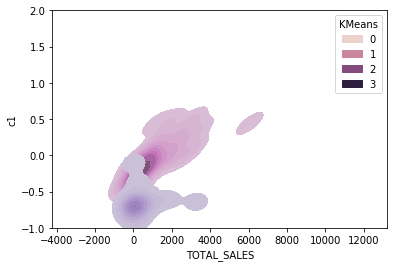

In [80]:
sns.kdeplot(x=sdf['TOTAL_SALES'].astype(int),y= sdf['c1'], hue=sdf['KMeans'] ,shade=True)
plt.ylim([-1,2])

C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette score: 0.6935890264584155


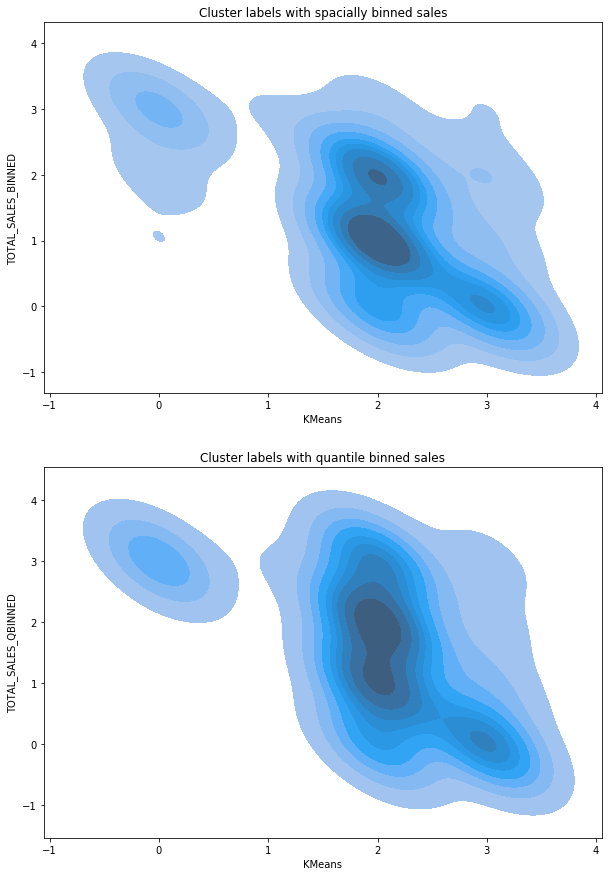

In [82]:
evaluate_clusters(X, sdf['KMeans'], sdf['TOTAL_SALES_BINNED'], sdf['TOTAL_SALES_QBINNED'])

## KMeans - no_review, Rvol/%rec, pos_reviews

In [101]:
sdf=df[['no_reviews','Rvol/%rec','pos_reviews']]
sdf['Rvol/%rec'] = sdf['Rvol/%rec'].replace(np.nan, sdf['Rvol/%rec'].median())
sdf = (sdf-sdf.mean())/sdf.std()
sdf['TOTAL_SALES'] = df['TOTAL_SALES']
sdf['TOTAL_SALES_BINNED'] = pd.cut(sdf['TOTAL_SALES'], [0,200,800,3200,20000], labels=[0,1,2,3])
sdf['TOTAL_SALES_QBINNED'] = pd.qcut(sdf['TOTAL_SALES'], 4, labels=[0,1,2,3])
X = sdf[['no_reviews','Rvol/%rec','pos_reviews']]
km = KMeans(
    n_clusters=4, init='random',
    n_init=1000, max_iter=1000, 
    tol=1e-06, random_state=0
)
y_km = km.fit_predict(X)
sdf['KMeans'] = pd.Series(y_km, index=sdf.index)

C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Rory\Anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette score: 0.6137931249587546


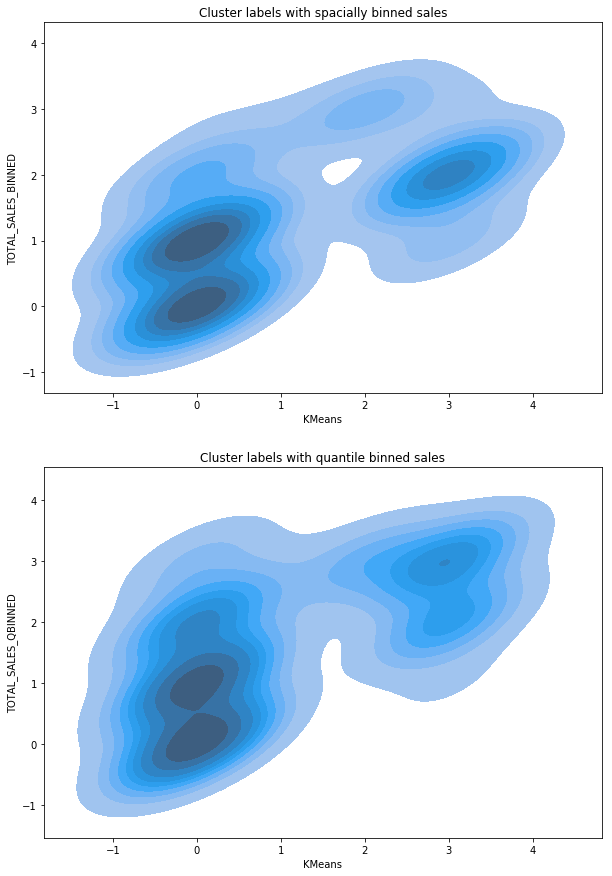

In [102]:
evaluate_clusters(X, sdf['KMeans'], sdf['TOTAL_SALES_BINNED'], sdf['TOTAL_SALES_QBINNED'])


## Visualising weights

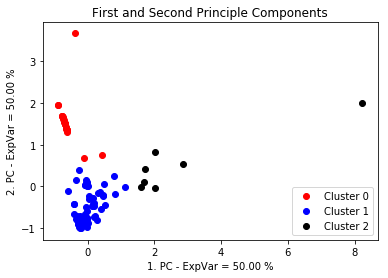

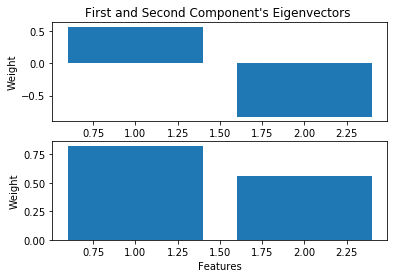

In [27]:
from eigencluster import show_results

show_results(X,2,4)

In [16]:

sdf.sort_values(by=sdf['KMeans'], ascending=False)

KeyError: 0      1
1      1
2      1
3      1
4      2
5      0
6      1
7      1
8      2
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     3
20     2
21     0
22     1
23     1
24     1
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     0
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     0
62     0
63     0
64     1
65     1
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     2
74     0
75     0
76     0
77     1
78     0
79     0
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     0
89     0
90     1
91     0
92     1
93     2
94     0
95     0
96     2
97     2
98     2
99     1
100    2
101    0
102    0
103    1
104    1
105    1
106    1
107    1
108    2
109    1
110    1
111    1
Name: KMeans, dtype: int32

In [37]:
sdf

,price,summary_star_rating,price/Rvol,Rvol/%rec,posR/Rvol,negR/Rvol,c1,c2,KMeans,TOTAL_SALES
0,-0.636457,0.609473,NaN,-0.204581,0.605638,-0.482353,-0.063114,-0.902233,1,1810
1,-0.965393,0.453507,NaN,0.190739,0.310779,-0.103258,0.398170,-0.550623,1,2780
2,-0.197877,0.557484,NaN,-0.370822,0.605638,-0.482353,-0.240931,-0.850224,1,248
3,-1.009251,0.401519,NaN,-0.052193,-0.789273,0.713255,0.367917,-0.141653,1,3453
4,-0.526812,0.401519,NaN,0.792545,-0.324303,0.115451,1.119695,-0.014738,2,3278
5,-0.526812,-1.937965,NaN,NaN,NaN,NaN,-0.640058,1.389196,0,3278
6,-0.746103,0.661461,NaN,-0.431274,0.605638,-0.482353,-0.244083,-0.997156,1,464
7,-0.855748,0.453507,NaN,0.069058,-0.493383,0.459641,0.440862,-0.206095,1,6051
8,0.065271,0.505496,NaN,2.258812,0.040060,0.153906,2.847202,0.534917,2,5038
9,-0.965393,0.505496,NaN,0.201615,0.605638,-0.482353,0.284173,-0.795549,1,2485


**If my interpretation is correct then the primary component is equally balanced between both features and so is the second. Now I should adjust weights to get better results.**

##  Weighting the algorithm

In [264]:
dfs[0]

array([-0.63931797, -0.10493894])

In [265]:
X = dfs
Xw = X
Xw[:,[1]] *=1.2
Xw[:,[0]] *= -1

In [266]:
Xw[0]

array([ 0.63931797, -0.12592673])

### The number of reviews column has no been multipled by 1.2

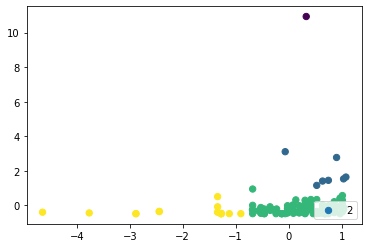

In [267]:
kmw = KMeans(
    n_clusters=4, init='random',
    n_init=1000, max_iter=1000, 
    tol=1e-06, random_state=3
)
wy_km = kmw.fit_predict(Xw)
dfc['kmw_cluster'] = pd.Series(wy_km, index=dfc.index)
plt.scatter(Xw[:, 0], Xw[:, 1], c=wy_km, s=40, cmap='viridis')
plt.legend(wy_km, loc=4)

In [258]:
#dfc.sort_values('TOTAL_SALES', ascending=False)

In [278]:
dfc['quants'] = pd.qcut(df['TOTAL_SALES'],4,['3','2','1','0'])
dfc['cuts'] = pd.cut(df['TOTAL_SALES'],4,False,['3','2','1','0'])

In [235]:
df['TOTAL_SALES'].sum()

142967

In [248]:
((dfc['kmw_cluster']) == (dfc['quants'].astype('int'))).value_counts()
# 29.5% correct

False    79
True     33
dtype: int64

In [252]:
((dfc['kmw_cluster']) == (dfc['cuts'].astype('int'))).value_counts()

False    95
True     17
dtype: int64

In [ ]:
# 15% correct

### Increasing weight of number of reviews

In [299]:
X = dfs
Xw = X
Xw[:,[1]] *=1.5
Xw[:,[0]] *= -1

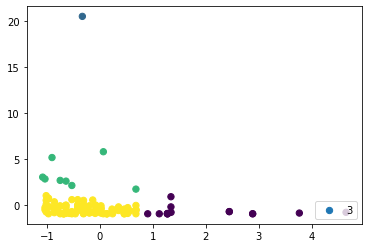

In [300]:
kmw2 = KMeans(
    n_clusters=4, init='random',
    n_init=10000, max_iter=10000, 
    tol=1e-06, random_state=None,
    algorithm='full'
)
w2y_km = kmw2.fit_predict(Xw)
dfc['kmw2_cluster'] = pd.Series(w2y_km, index=dfc.index)
plt.scatter(Xw[:, 0], Xw[:, 1], c=w2y_km, s=40, cmap='viridis')
plt.legend(w2y_km, loc=4)


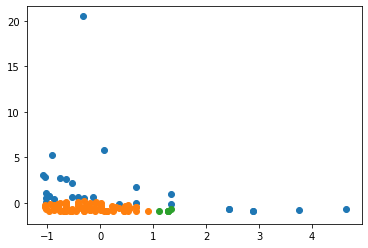

In [304]:
from sklearn.cluster import DBSCAN
from numpy import unique, where
from matplotlib import pyplot

# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=5)

# train the model
db_clust = dbscan_model.fit_predict(X)



dfc['db_clust'] = pd.Series(db_clust, index=dfc.index)
# get all of the unique clusters
dbscan_cluster = unique(db_clust)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_cluster:
    # get data points that fall in this cluster
    index = where(db_clust == dbscan_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the DBSCAN plot
pyplot.show()

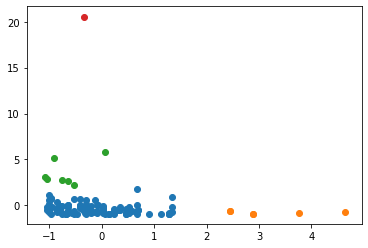

In [307]:
from sklearn.cluster import Birch

birch_model = Birch(threshold=0.03, n_clusters=4)
# train the model
birchy = birch_model.fit_predict(X)



dfc['birch'] = pd.Series(birchy, index=dfc.index)
# get all of the unique clusters
birch_cluster = unique(birchy)

# plot the DBSCAN clusters
for birch_cluster in birch_cluster:
    # get data points that fall in this cluster
    index = where(birchy == birch_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the DBSCAN plot
pyplot.show()

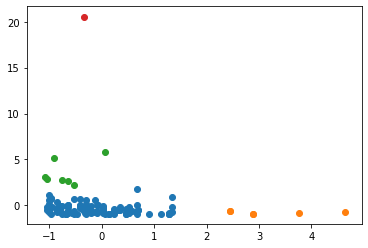

In [324]:
from sklearn.cluster import AgglomerativeClustering

AP =  AgglomerativeClustering(n_clusters=4)
Apm = AP.fit_predict(X)



dfc['Ag'] = pd.Series(Apm, index=dfc.index)
# get all of the unique clusters
Apm_cluster = unique(Apm)

# plot the DBSCAN clusters
for Apm_cluster in Apm_cluster:
    # get data points that fall in this cluster
    index = where(Apm == Apm_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the DBSCAN plot
pyplot.show()

## Finding best number of clusters

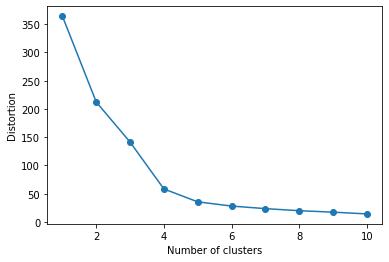

In [261]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Xw)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [262]:
# 4 or 5

In [297]:


dfc.loc[dfc['kmw2_cluster']==3, 'kmw2_cluster'] = 1
dfc.loc[dfc['kmw2_cluster']==2, 'kmw2_cluster'] = 3
dfc.loc[dfc['kmw2_cluster']==1, 'kmw2_cluster'] = 2
dfc.loc[dfc['kmw2_cluster']==0, 'kmw2_cluster'] = 0



In [325]:
dfc.sort_values('TOTAL_SALES', ascending=False)

,remotekey,price,no_reviews,TOTAL_SALES,km_cluster,kmw_cluster,quants,cuts,kmw2_cluster,db_clust,birch,AP,Ag
39,5029976,539.99,544,18554,2,0,0,0,1,-1,3,3,3
40,9149364,219.99,96,8686,0,1,0,2,2,-1,2,2,2
117,8345169,199.99,101,6067,0,1,0,2,2,-1,2,2,2
27,8986494,299.99,33,6051,0,2,0,2,3,-1,0,0,0
28,7816204,719.99,171,5038,0,1,0,2,2,-1,2,2,2
113,8699035,399.99,90,4311,0,1,0,3,2,-1,2,2,2
118,8214537,279.99,155,4158,0,1,0,3,2,-1,2,2,2
128,7353066,349.99,92,4126,0,1,0,3,2,-1,2,2,2
10,8919928,229.99,26,3453,0,2,0,3,3,-1,0,0,0
20,8483935,449.99,0,3278,0,2,0,3,3,0,0,0,0


In [309]:
# dbscan clusters are quite nice, all high sales are -1 and all lowest sales are 1. 
# there are many points which lie in the middle as 0s. Perhaps multiple clustering could be combined

# birch is fucking good, the highest seller has a point of its own (3) and all the next top sellers have a point of their own
# most next top sellers are all 2s with a small bit of leakage
# there are few 1s, 0s dominate the lowest sellers but also leak into the top
# PROMISING

In [ ]:
# Been trying to get the cluster numbers to change to what the quants are...... not working ffs